<a href="https://colab.research.google.com/github/abhidp55/Fraudulent-Transaction-Detection/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Jupyter Notebook is a comprehensive analysis of the dataset 'transactions.txt' and application of machine learning models for the task of boolean binary classification (isFraud)

The objective is to develop a predictive machine learning model to classify new datapoints as fraudulent or not

# Loading The Dataset into a Pandas DataFrame 

In [ ]:
# transactions.zip is a repo in Google Drive
# This cell mounts GDrive onto this Jupyter Notebook

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!unzip "/content/gdrive/MyDrive/Colab Notebooks/Git_ML/internship/transactions.zip"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Git_ML/internship/transactions.zip
  inflating: transactions.txt        


In [ ]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading the dataset

df = pd.read_json('transactions.txt', lines=True)

# Looking at the dataset and making some decisions before proceeding to exploratory data analysis

In [ ]:
# Observing values of the first 10 rows (always a good idea to manually look at the data first)

df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
accountNumber,737265056,737265056,737265056,737265056,830329091,830329091,830329091,830329091,830329091,830329091
customerId,737265056,737265056,737265056,737265056,830329091,830329091,830329091,830329091,830329091,830329091
creditLimit,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
availableMoney,5000,5000,5000,5000,5000,5000,5000,5000,4990.63,5000
transactionDateTime,2016-08-13T14:27:32,2016-10-11T05:05:54,2016-11-08T09:18:39,2016-12-10T02:14:50,2016-03-24T21:04:46,2016-04-19T16:24:27,2016-05-21T14:50:35,2016-06-03T00:31:21,2016-06-10T01:21:46,2016-07-11T10:47:16
transactionAmount,98.55,74.51,7.47,7.47,71.18,30.76,57.28,9.37,523.67,164.37
merchantName,Uber,AMC #191138,Play Store,Play Store,Tim Hortons #947751,In-N-Out #422833,Krispy Kreme #685312,Shake Shack #968081,Burger King #486122,Five Guys #510989
acqCountry,US,US,US,US,US,US,US,US,,US
merchantCountryCode,US,US,US,US,US,US,US,US,US,US
posEntryMode,02,09,09,09,02,02,02,05,02,05


It looks like some of the columns are blank, and there's a collection of various datatypes:
String, float, datetime, categorical, int, boolean, object

In [ ]:
# Useful to check out the datatypes for each feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [ ]:
# Useful to check out the number of Null values for each feature

df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [ ]:
# Useful to check out the distribution of all the continuous valued featured of the dataset

df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [ ]:
# Total number of records and features

print("Number of records: {}, number of fields: {}\n".format(df.shape[0], df.shape[1]))

Number of records: 786363, number of fields: 29



In [ ]:
# Distributions of the categories of the various categorical features

print('acqCountry: \n', df['acqCountry'].value_counts())
print('\n')
print('merchantCountryCode:\n', df['merchantCountryCode'].value_counts())
print('\n')
print('cardPresent:\n', df['cardPresent'].value_counts())
print('\n')
print('creditLimit:\n', df['creditLimit'].unique())
print('\n')
print('expirationDateKeyInMatch:\n', df['expirationDateKeyInMatch'].value_counts())
print('\n')
print('merchantCategoryCode:', df['merchantCategoryCode'].unique())
print('\n')
print('transactionType:\n', df['transactionType'].value_counts())
print('\n')
print('posEntryMode:', df['posEntryMode'].unique())
print('\n')
print('posConditionCode:', df['posConditionCode'].unique())
print('\n')
print('isFraud:\n', df['isFraud'].value_counts())


acqCountry: 
 US     774709
         4562
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64


merchantCountryCode:
 US     778511
MEX      3143
CAN      2426
PR       1559
          724
Name: merchantCountryCode, dtype: int64


cardPresent:
 False    433495
True     352868
Name: cardPresent, dtype: int64


creditLimit:
 [ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]


expirationDateKeyInMatch:
 False    785320
True       1043
Name: expirationDateKeyInMatch, dtype: int64


merchantCategoryCode: ['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']


transactionType:
 PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64


posEntryMode: ['02' '09' '05' '80' '90' '

In [ ]:
# Some of the features are not useful for our models, so it's a good idea to drop them completely

df = df.drop(['echoBuffer', 'merchantCity', 'merchantState',
                  'merchantZip', 'posOnPremises', 'recurringAuthInd','accountNumber','customerId','merchantName'], axis=1)

# Exploratory Data Analysis

In [ ]:
# Correlation matrix is a good idea to figure out the correlation between the independent features and the dependent (target = isFraud) feature

df.corr().drop('isFraud',axis=1)

,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch
creditLimit,1.000000,0.834977,0.005581,0.051006,0.051088,0.125611,0.653652,-0.003929,0.002391
availableMoney,0.834977,1.000000,-0.010070,0.016253,0.016323,0.073879,0.129332,0.002508,0.004067
transactionAmount,0.005581,-0.010070,1.000000,-0.000233,-0.000141,-0.001513,0.023905,0.037361,0.001751
cardCVV,0.051006,0.016253,-0.000233,1.000000,0.996008,-0.011608,0.069559,-0.045319,-0.000416
enteredCVV,0.051088,0.016323,-0.000141,0.996008,1.000000,-0.011485,0.069610,-0.045113,-0.000200
cardLast4Digits,0.125611,0.073879,-0.001513,-0.011608,-0.011485,1.000000,0.124745,0.040726,0.002087
currentBalance,0.653652,0.129332,0.023905,0.069559,0.069610,0.124745,1.000000,-0.010529,-0.001285
cardPresent,-0.003929,0.002508,0.037361,-0.045319,-0.045113,0.040726,-0.010529,1.000000,0.040393
expirationDateKeyInMatch,0.002391,0.004067,0.001751,-0.000416,-0.000200,0.002087,-0.001285,0.040393,1.000000
isFraud,0.003108,-0.001538,0.075651,0.008652,0.008655,0.000886,0.007715,-0.043418,-0.000972


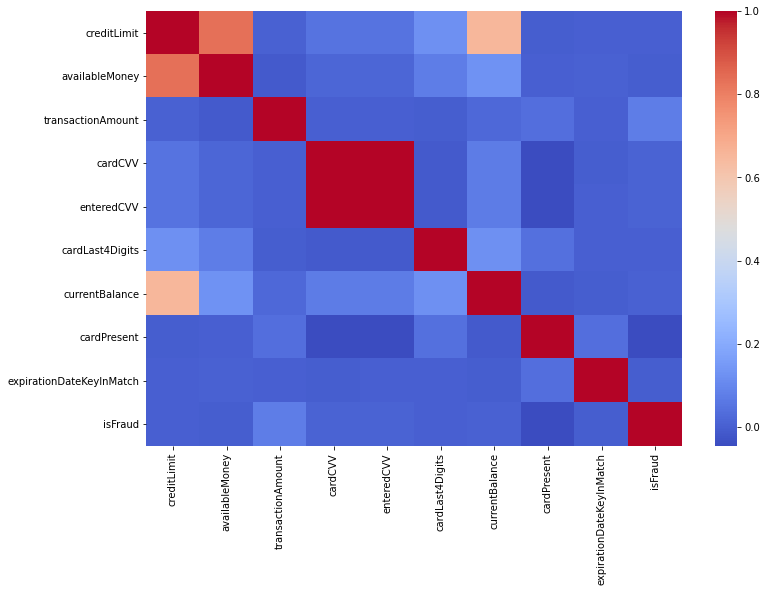

In [ ]:
# Drawing a heatmap to visualize the correlation

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


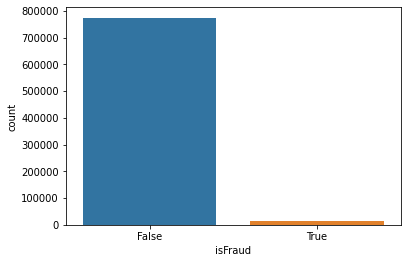

In [ ]:
# Distribution of the target

sns.countplot(df['isFraud'])

It looks like the dataset is heavily skewed (imbalanced classes) and some technique needs to be applied, such as oversampling, to balance the distribution before proceeding to modeling

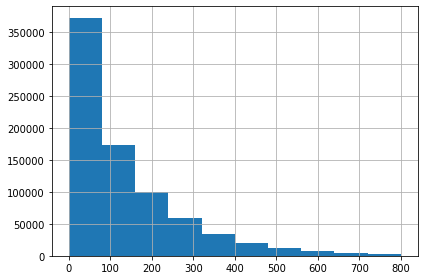

In [ ]:
# Transaction amount histogram

transaction_amount = df['transactionAmount']
trans_data = transaction_amount[transaction_amount <= 800]
trans_data.hist(bins=10)
plt.tight_layout()
plt.show()

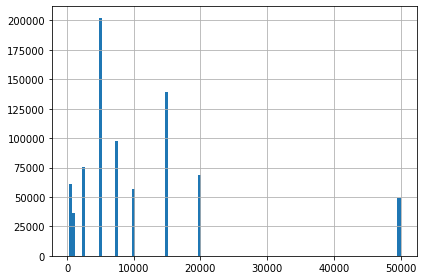

In [ ]:
# Credit history histogram

credit_data = df['creditLimit']
credit_data.hist(bins=100)
plt.tight_layout()
plt.show()

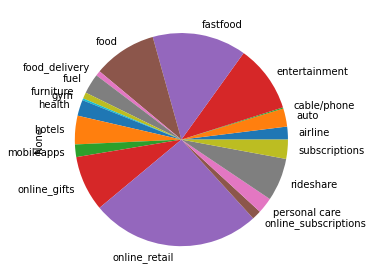

In [ ]:
# Merchant Category Code distribution using a pie chart

merch = df.groupby('merchantCategoryCode').size()
merch.plot(kind='pie')
plt.tight_layout()
plt.show()

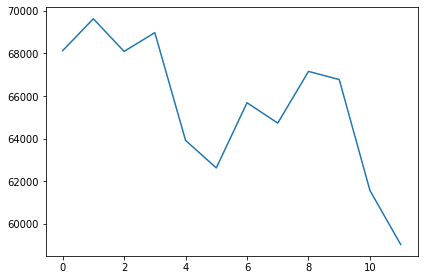

In [ ]:
# Distribition

from collections import Counter
transaction_time = df['transactionDateTime']
trans_counter = Counter()
for i in transaction_time.values:
    month = i.split('-')[1]
    trans_counter[month] += 1
trans = pd.DataFrame.from_dict(trans_counter, orient='index').reset_index()
trans.plot(legend=False, xticks=None)
plt.tight_layout()
plt.show()





# Next Step - Data Cleaning

## Some of the columns are objects which need to be converted to pandas datetime data type

In [ ]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

In [ ]:
df.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,5000,5000.0,2016-08-13 14:27:32,98.55,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,5000,5000.0,2016-10-11 05:05:54,74.51,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,5000,5000.0,2016-11-08 09:18:39,7.47,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,5000,5000.0,2016-12-10 02:14:50,7.47,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,5000,5000.0,2016-03-24 21:04:46,71.18,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


## Feature Engineering - hypothesis is that there may be a stronger relationship between the target and the columns in year, month format

In [ ]:
df['transactionDateTime_year'] = pd.DatetimeIndex(df['transactionDateTime']).year
df['transactionDateTime_month'] = pd.DatetimeIndex(df['transactionDateTime']).month

df['currentExpDate_year'] = pd.DatetimeIndex(df['currentExpDate']).year
df['currentExpDate_month'] = pd.DatetimeIndex(df['currentExpDate']).month

df['accountOpenDate_year'] = pd.DatetimeIndex(df['accountOpenDate']).year
df['accountOpenDate_month'] = pd.DatetimeIndex(df['accountOpenDate']).month

df['dateOfLastAddressChange_year'] = pd.DatetimeIndex(df['dateOfLastAddressChange']).year
df['dateOfLastAddressChange_month'] = pd.DatetimeIndex(df['dateOfLastAddressChange']).month

In [ ]:
data_raw = df[['availableMoney', 'currentBalance', 'transactionAmount', 'creditLimit','transactionDateTime_year'
              ,'transactionDateTime_month','currentExpDate_year','currentExpDate_month','accountOpenDate_year'
              ,'accountOpenDate_month','dateOfLastAddressChange_year','dateOfLastAddressChange_month']]

data_raw['cvvMatch'] = df['enteredCVV'] == df['cardCVV']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## One Hot Encoding Categorical Data

In [ ]:
new_expirationDateKeyInMatch = pd.get_dummies(df['expirationDateKeyInMatch'], drop_first=True)
new_cardPresent = pd.get_dummies(df['cardPresent'],drop_first=True)
new_posConditionCode = pd.get_dummies(df['posConditionCode'],drop_first=True)
new_posEntryMode = pd.get_dummies(df['posEntryMode'],drop_first=True)
new_transactionType = pd.get_dummies(df['transactionType'],drop_first=True)
new_merchantCategoryCode = pd.get_dummies(df['merchantCategoryCode'],drop_first=True)
new_merchantCountryCode = pd.get_dummies(df['merchantCountryCode'],drop_first=True)
is_fraud = df['isFraud'].apply(int)
data_raw['cvvMatch'] = data_raw['cvvMatch'].apply(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data_raw = pd.concat([data_raw, new_expirationDateKeyInMatch, new_cardPresent, new_posConditionCode,
                          new_merchantCategoryCode,new_merchantCountryCode, new_posEntryMode, new_transactionType, is_fraud], axis=1)

In [ ]:
data_raw.head()

,availableMoney,currentBalance,transactionAmount,creditLimit,transactionDateTime_year,transactionDateTime_month,currentExpDate_year,currentExpDate_month,accountOpenDate_year,accountOpenDate_month,dateOfLastAddressChange_year,dateOfLastAddressChange_month,cvvMatch,True,True,01,08,99,auto,cable/phone,entertainment,fastfood,food,food_delivery,fuel,furniture,gym,health,hotels,mobileapps,online_gifts,online_retail,online_subscriptions,personal care,rideshare,subscriptions,CAN,MEX,PR,US,02,05,09,80,90,ADDRESS_VERIFICATION,PURCHASE,REVERSAL,isFraud
0,5000.0,0.0,98.55,5000,2016,8,2023,6,2015,3,2015,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1,5000.0,0.0,74.51,5000,2016,10,2024,2,2015,3,2015,3,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,5000.0,0.0,7.47,5000,2016,11,2025,8,2015,3,2015,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,5000.0,0.0,7.47,5000,2016,12,2025,8,2015,3,2015,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,5000.0,0.0,71.18,5000,2016,3,2029,10,2015,8,2015,8,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   availableMoney                 786363 non-null  float64
 1   currentBalance                 786363 non-null  float64
 2   transactionAmount              786363 non-null  float64
 3   creditLimit                    786363 non-null  int64  
 4   transactionDateTime_year       786363 non-null  int64  
 5   transactionDateTime_month      786363 non-null  int64  
 6   currentExpDate_year            786363 non-null  int64  
 7   currentExpDate_month           786363 non-null  int64  
 8   accountOpenDate_year           786363 non-null  int64  
 9   accountOpenDate_month          786363 non-null  int64  
 10  dateOfLastAddressChange_year   786363 non-null  int64  
 11  dateOfLastAddressChange_month  786363 non-null  int64  
 12  cvvMatch                      

# Train Val Test Split

The dataset is split into training, validation and testing (75:15:10 ratio)

The training subset is used for training Machine Learning models
The validation subset is used for hyperparameter tuning the ML models

The testing subset is evaluated on in the very end to ensure that no bias has been added to the models while tuning using the validation subset (since the tuning we may do for increasing performance would work well on validation subset but may end up decreasing generalization)

In [ ]:
X = data_raw.drop('isFraud', axis=1)
y = data_raw['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split
import time

In [ ]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:
new_df = pd.concat([X_train, y_train],
                   axis=1)
new_df.head()

,availableMoney,currentBalance,transactionAmount,creditLimit,transactionDateTime_year,transactionDateTime_month,currentExpDate_year,currentExpDate_month,accountOpenDate_year,accountOpenDate_month,dateOfLastAddressChange_year,dateOfLastAddressChange_month,cvvMatch,True,True,01,08,99,auto,cable/phone,entertainment,fastfood,food,food_delivery,fuel,furniture,gym,health,hotels,mobileapps,online_gifts,online_retail,online_subscriptions,personal care,rideshare,subscriptions,CAN,MEX,PR,US,02,05,09,80,90,ADDRESS_VERIFICATION,PURCHASE,REVERSAL,isFraud
422064,990.58,1509.42,436.92,2500,2016,3,2022,2,2010,3,2016,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
209949,40731.26,9268.74,42.67,50000,2016,6,2024,7,2014,11,2014,11,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
277440,14477.83,5522.17,101.64,20000,2016,2,2025,4,2011,12,2011,12,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
691313,55.88,194.12,274.87,250,2016,3,2021,1,2015,6,2016,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
288038,2046.31,2953.69,73.47,5000,2016,6,2022,8,2015,11,2016,5,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0


##Due to class imbalance, we use oversampling of the minority class (isFraud = True)




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


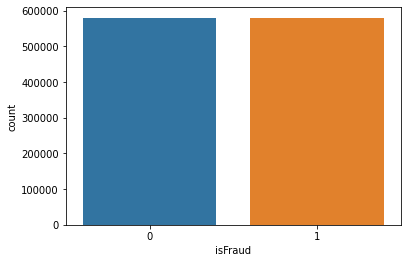

In [ ]:
max_size = new_df['isFraud'].value_counts().max()

lst = [new_df]
for class_index, group in new_df.groupby('isFraud'):
    lst.append(group.sample(max_size-len(group), replace=True))
frame_new = pd.concat(lst)
sns.countplot(frame_new['isFraud'])

In [ ]:
X_train = frame_new.drop('isFraud', axis=1)
y_train = frame_new['isFraud']

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_val)
acc_logreg = accuracy_score(y_val,y_pred)
print("Accuracy", acc_logreg)

Accuracy 0.6794682672906387


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print(f'f1 score: {f1_score(y_val, y_pred)}')
recall_logreg = recall_score(y_val,y_pred)
precision_logreg = precision_score(y_val,y_pred)
f1_logreg = f1_score(y_val,y_pred)

Accuracy Score: 0.6794682672906387
Confusion Matrix: 
[[78958 37142]
 [  666  1188]]
Area Under Curve: 0.6604314158366993
Recall score: 0.6407766990291263
Precision score: 0.030993999478215496
f1 score: 0.05912801114871591


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.99      0.68      0.81    116100
    Fraudulent       0.03      0.64      0.06      1854

      accuracy                           0.68    117954
     macro avg       0.51      0.66      0.43    117954
  weighted avg       0.98      0.68      0.80    117954



# SVC (Takes Time to Run)

In [ ]:
# svc = SVC()
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_val)
# acc_svc = accuracy_score(y_val, y_pred)
# print(confusion_matrix(y_val, y_pred))

In [ ]:
# print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
# print(f'Recall score: {recall_score(y_val, y_pred)}')
# print(f'Precision score: {precision_score(y_val, y_pred)}')
# print(f'f1 score: {f1_score(y_val, y_pred)}')

# recall_svc = recall_score(y_val, y_pred)
# precision_svc = precision_score(y_val, y_pred)
# f1_svc = f1_score(y_val, y_pred)


In [ ]:
# print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

# XGBoost (Boosting Decision Trees)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0).fit(X_train, y_train)

In [ ]:
y_val = clf.predict(X_val)
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print(f'f1 score: {f1_score(y_val, y_pred)}')

acc_xgb = accuracy_score(y_val, y_pred)
recall_xgb = recall_score(y_val, y_pred)
precision_xgb = precision_score(y_val, y_pred)
f1_xgb = f1_score(y_val, y_pred)



Accuracy Score: 0.7961154348305272
Confusion Matrix: 
[[69632 14057]
 [ 9992 24273]]
Area Under Curve: 0.7702116847855732
Recall score: 0.7083904859185758
Precision score: 0.6332637620662667
f1 score: 0.6687237413044975


In [ ]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.87      0.83      0.85     83689
    Fraudulent       0.63      0.71      0.67     34265

      accuracy                           0.80    117954
     macro avg       0.75      0.77      0.76    117954
  weighted avg       0.80      0.80      0.80    117954



# Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)
acc_tree = accuracy_score(y_val, y_pred)
acc_tree

0.7142191023619378

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print(f'f1 score: {f1_score(y_val, y_pred)}')

recall_tree = recall_score(y_val, y_pred)
precision_tree = precision_score(y_val, y_pred)
f1_tree = f1_score(y_val, y_pred)

Accuracy Score: 0.7142191023619378
Confusion Matrix: 
[[83041   648]
 [33061  1204]]
Area Under Curve: 0.5136974713678913
Recall score: 0.035137895812053115
Precision score: 0.6501079913606912
f1 score: 0.06667220422515714


In [ ]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.72      0.99      0.83     83689
    Fraudulent       0.65      0.04      0.07     34265

      accuracy                           0.71    117954
     macro avg       0.68      0.51      0.45    117954
  weighted avg       0.70      0.71      0.61    117954



# Random Forest 

In [ ]:
rfc = RandomForestClassifier(n_estimators=75)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)
acc_rfc = accuracy_score(y_val, y_pred)
acc_rfc

0.7099886396391814

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print(f'f1 score: {f1_score(y_val, y_pred)}')

recall_rfc = recall_score(y_val, y_pred)
precision_rfc = precision_score(y_val, y_pred)
f1_rfc = f1_score(y_val, y_pred)

Accuracy Score: 0.7099886396391814
Confusion Matrix: 
[[83680     9]
 [34199    66]]
Area Under Curve: 0.5009093113544841
Recall score: 0.0019261637239165329
Precision score: 0.88
f1 score: 0.00384391380314502


In [ ]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.71      1.00      0.83     83689
    Fraudulent       0.88      0.00      0.00     34265

      accuracy                           0.71    117954
     macro avg       0.79      0.50      0.42    117954
  weighted avg       0.76      0.71      0.59    117954



# Bagging Decision Tree

In [ ]:
from sklearn.ensemble import BaggingClassifier
import sklearn

kfold = sklearn.model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print(f'f1 score: {f1_score(y_val, y_pred)}')

acc_bc = accuracy_score(y_val, y_pred)
recall_bc = recall_score(y_val, y_pred)
precision_bc = precision_score(y_val, y_pred)
f1_bc = f1_score(y_val, y_pred)


Accuracy Score: 0.7104294894619937
Confusion Matrix: 
[[83625    64]
 [34092   173]]
Area Under Curve: 0.5021420737971354
Recall score: 0.005048883700569094
Precision score: 0.729957805907173
f1 score: 0.01002840415048403


In [ ]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.71      1.00      0.83     83689
    Fraudulent       0.73      0.01      0.01     34265

      accuracy                           0.71    117954
     macro avg       0.72      0.50      0.42    117954
  weighted avg       0.72      0.71      0.59    117954



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

In [ ]:
start_time = time.time()
clf = clf.fit(X_train, y_train)
total_time = time.time() - start_time
print("Total Time for training a Naive Bayes Classifier is", total_time)

Total Time for training a Naive Bayes Classifier is 0.8258199691772461


In [ ]:
start_time = time.time()
y_pred = clf.predict(X_val)
total_time = time.time() - start_time
print("Total Time for inference of a Naive Bayes Classifier is", total_time)

Total Time for inference of a Naive Bayes Classifier is 0.07331252098083496


In [ ]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print(f'f1 score: {f1_score(y_val, y_pred)}')

acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred)
precision_nb = precision_score(y_val, y_pred)
f1_nb = f1_score(y_val, y_pred)


Accuracy Score: 0.7527510724519728
Confusion Matrix: 
[[59751 23938]
 [ 5226 29039]]
Area Under Curve: 0.7807238262327671
Recall score: 0.8474828542244273
Precision score: 0.548143533986447
f1 score: 0.665711469246464


In [ ]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.92      0.71      0.80     83689
    Fraudulent       0.55      0.85      0.67     34265

      accuracy                           0.75    117954
     macro avg       0.73      0.78      0.73    117954
  weighted avg       0.81      0.75      0.76    117954



# K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc_knn = accuracy_score(y_val, y_pred)
acc_knn

0.7050714685385828

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print(f'f1 score: {f1_score(y_val, y_pred)}')

acc_knn = accuracy_score(y_val, y_pred)
recall_knn = recall_score(y_val, y_pred)
precision_knn = precision_score(y_val, y_pred)
f1_knn = f1_score(y_val, y_pred)


Accuracy Score: 0.7050714685385828
Confusion Matrix: 
[[81644  2045]
 [32743  1522]]
Area Under Curve: 0.5099913972244529
Recall score: 0.04441850284546914
Precision score: 0.42668909447715164
f1 score: 0.08046098540917741


In [ ]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.71      0.98      0.82     83689
    Fraudulent       0.43      0.04      0.08     34265

      accuracy                           0.71    117954
     macro avg       0.57      0.51      0.45    117954
  weighted avg       0.63      0.71      0.61    117954



##Elbow Method


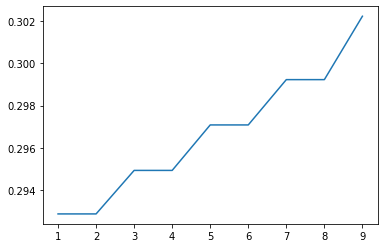

In [ ]:
error_rate = []
range_knn = range(1,10)
for i in range_knn:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    pred_i = classifier.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))
plt.plot(range_knn, error_rate)

# Deep Learning

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam

In [ ]:
y_train = np.reshape(y_train.values, (len(y_train), 1))

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=[X_train.shape[1]], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
number_of_iterations = 20
batch_size = 512
model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=2, validation_data=(X_val, y_val))

Epoch 1/20
2268/2268 - 19s - loss: 33.7067 - accuracy: 0.5395 - val_loss: 2.0114 - val_accuracy: 0.5487
Epoch 2/20
2268/2268 - 4s - loss: 1.6616 - accuracy: 0.5752 - val_loss: 0.9709 - val_accuracy: 0.6798
Epoch 3/20
2268/2268 - 4s - loss: 1.3088 - accuracy: 0.5927 - val_loss: 0.8905 - val_accuracy: 0.6920
Epoch 4/20
2268/2268 - 4s - loss: 1.1446 - accuracy: 0.6053 - val_loss: 0.7469 - val_accuracy: 0.7009
Epoch 5/20
2268/2268 - 4s - loss: 1.0491 - accuracy: 0.6115 - val_loss: 0.6651 - val_accuracy: 0.7185
Epoch 6/20
2268/2268 - 4s - loss: 0.9659 - accuracy: 0.6188 - val_loss: 2.4013 - val_accuracy: 0.4275
Epoch 7/20
2268/2268 - 4s - loss: 0.9437 - accuracy: 0.6219 - val_loss: 0.5284 - val_accuracy: 0.7723
Epoch 8/20
2268/2268 - 4s - loss: 0.9242 - accuracy: 0.6234 - val_loss: 0.5649 - val_accuracy: 0.7674
Epoch 9/20
2268/2268 - 5s - loss: 0.9015 - accuracy: 0.6261 - val_loss: 0.6392 - val_accuracy: 0.7394
Epoch 10/20
2268/2268 - 5s - loss: 0.8801 - accuracy: 0.6279 - val_loss: 0.4797 

In [ ]:
y_pred_value = model.predict(X_val)
y_pred = [0 if each > 0.5 else 1 for each in y_pred_value]
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print(f'f1 score: {f1_score(y_val, y_pred)}')
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

acc_dl = accuracy_score(y_val, y_pred)
recall_dl = recall_score(y_val, y_pred)
precision_dl = precision_score(y_val, y_pred)
f1_dl = f1_score(y_val, y_pred)


Accuracy Score: 0.28495854316089325
Confusion Matrix: 
[[30055 53634]
 [30708  3557]]
Area Under Curve: 0.23146789795912467
Recall score: 0.10380855099956224
Precision score: 0.06219510062772114
f1 score: 0.07778603918824353
                precision    recall  f1-score   support

Not Fraudulent       0.49      0.36      0.42     83689
    Fraudulent       0.06      0.10      0.08     34265

      accuracy                           0.28    117954
     macro avg       0.28      0.23      0.25    117954
  weighted avg       0.37      0.28      0.32    117954



# Results

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'XGBoost', 'Decision Trees', 'Random Forest Classifier', 
              'Bagging Decision Tree','Naive Bayes','KNN','Deep learning'],
    'Accuracy': [acc_logreg, 
              acc_xgb, acc_tree, acc_rfc, 
              acc_bc, acc_nb, acc_knn, acc_dl],
    'Recall': [recall_logreg, 
    recall_xgb, recall_tree, recall_rfc, 
    recall_bc, recall_nb, recall_knn, recall_dl],
    'Precision': [precision_logreg, 
    precision_xgb, precision_tree, precision_rfc, 
    precision_bc, precision_nb, precision_knn, precision_dl],
    'F1': [f1_logreg, 
     f1_xgb, f1_tree, f1_rfc, 
     f1_bc, f1_nb, f1_knn, f1_dl]})
models.sort_values(by='Recall', ascending=False)

,Model,Accuracy,Recall,Precision,F1
5,Naive Bayes,0.752751,0.847483,0.548144,0.665711
1,XGBoost,0.796115,0.708390,0.633264,0.668724
0,Logistic Regression,0.679468,0.640777,0.030994,0.059128
7,Deep learning,0.284959,0.103809,0.062195,0.077786
6,KNN,0.705071,0.044419,0.426689,0.080461
2,Decision Trees,0.714219,0.035138,0.650108,0.066672
4,Bagging Decision Tree,0.710429,0.005049,0.729958,0.010028
3,Random Forest Classifier,0.709989,0.001926,0.880000,0.003844
